In [32]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# 데이터 준비

In [2]:
# 패션 mnist 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
# 이미지 입력시에는 채널에 대한 정보가 있어야함
x_train.shape

(60000, 28, 28)

In [4]:
# 지금은 Conv2D를 적용하기 위해서 채널 차원을 추가
scaled_train = x_train.reshape(-1, 28, 28, 1) / 255

In [5]:
scaled_train.shape

(60000, 28, 28, 1)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
scaled_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# 합성곱 신경망 모델 구성

1. 합성곱 층으로 이미지에서 특징을 감지
2. 밀집층으로 클래스에 따른 분류 확률을 계산

In [8]:
model = keras.Sequential()

In [11]:
# 합성곱 층 추가
model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", padding = "same",
                             input_shape = (28, 28, 1)))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


- 패션 MNIST 이미지가 (28, 28) 크기에 세임 패딩을 적용, 32개의 필터 사용
    - 출력되는 특성맵의 크기는 (None, 28, 28, 32)

In [15]:
# 풀링층 추가
model.add(keras.layers.MaxPool2D(2))

- (2, 2) 크기의 커널을 이용하여 풀링을 적용해서 특성맵의 크기가 절반으로 줄어즐고 특성맵의 깊이는 그대로
    - 출력되는 특성맵의 크기는 (14, 14, 32) - (32=channel) 채널 크기는 줄어들지 않음!

In [16]:
# 두 번째 합성곱 - 풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size = 3, activation = "relu", padding = "same"))
model.add(keras.layers.MaxPool2D(2))

- (14, 14) 크기에 세임 패딩, 64개 필터 사용
    - 출력되는 특성맵의 크기(14, 14, 64)
- (2, 2) 크기의 커널을 이용하여 풀링
    - 출력되는 특성맵의 크기(7, 7, 64)

In [17]:
# 3차원 특성맵을 일렬로 펼침
# 10개의 유닛을 가진 밀집층에서 확률을 계산하기 때문에
model.add(keras.layers.Flatten()) # 7 * 7 * 64 = 3,136개로 압축

In [19]:
# 밀집 은닉층을 하나 더 추가한 후 드롭아웃을 넣어 과대적합을 방지하고 성능을 개선
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dropout(0.4))

In [20]:
# 출력층
# 10개의 클래스를 분류하는 다중 분류
model.add(keras.layers.Dense(10, activation = "softmax"))

In [21]:
# 모델 구조 확인
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 - 파라미터 개수
    - 첫 번째 합성곱 층
        - 필터의 크기 : (3, 3, 1) (kernel_size)
        - 필터의 개수 : 32 (=chennel)
            - 3 * 3 * 1 * 32 + 32 = 320
            
    - 두 번째 합성곱 층
        - 필터의 크기 : (3, 3, 32)
        - 필터의 개수 : 64
            - 3 * 3 * 32 * 64 + 64 = 18,496
            
    (Flatten 진행)
    - 7 * 7 * 64 = 3136
    
    - 밀집 은닉 층
        - Flatten 층에서 (3136,) 크기의 배열이 전달(7 * 7 * 64)
            - 3136 * 100 + 100 = 313,700
            
    - 출력층
        - 밀집 은닉층에서 (100,) 크기의 배열이 전달
        - 100 * 10 + 10 = 1,010

# 모델 훈련

- 옵티마이저 : Adam
- 콜백 함수 : ModelCheckpoint, EarlyStopping

In [28]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-cnn.model.keras",
                                               save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [31]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
                 metrics = ["accuracy"])

In [33]:
# 검증 데이터 분할
x_sub, x_val, y_sub, y_val = train_test_split(scaled_train, y_train, test_size = 0.2,
                                             stratify = y_train, random_state = 12)

In [34]:
history = model.fit(x_sub, y_sub, epochs = 20, validation_data = (x_val, y_val),
                   callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7486 - loss: 0.6970 - val_accuracy: 0.8682 - val_loss: 0.3632
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8823 - loss: 0.3331 - val_accuracy: 0.8937 - val_loss: 0.2926
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9019 - loss: 0.2799 - val_accuracy: 0.9019 - val_loss: 0.2647
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9102 - loss: 0.2441 - val_accuracy: 0.9068 - val_loss: 0.2541
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9223 - loss: 0.2179 - val_accuracy: 0.9134 - val_loss: 0.2448
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9260 - loss: 0.1989 - val_accuracy: 0.9147 - val_loss: 0.2477
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9326 - loss: 0.1826 - val_accuracy: 0.9122 - val_loss: 0.2505
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9357 - loss

# 훈련 로그 확인

In [36]:
history.history

{'accuracy': [0.8208541870117188,
  0.8847916722297668,
  0.901562511920929,
  0.9095625281333923,
  0.9194999933242798,
  0.9242500066757202,
  0.9315624833106995,
  0.9371874928474426,
  0.9399791955947876],
 'loss': [0.49902257323265076,
  0.32194846868515015,
  0.2756268084049225,
  0.24473392963409424,
  0.22136124968528748,
  0.202067032456398,
  0.18537001311779022,
  0.17024832963943481,
  0.158015176653862],
 'val_accuracy': [0.8681666851043701,
  0.893666684627533,
  0.9019166827201843,
  0.9067500233650208,
  0.9134166836738586,
  0.9147499799728394,
  0.9122499823570251,
  0.9138333201408386,
  0.9141666889190674],
 'val_loss': [0.3632042109966278,
  0.2926303744316101,
  0.26472780108451843,
  0.2541208863258362,
  0.2448040395975113,
  0.24773059785366058,
  0.25048908591270447,
  0.25352180004119873,
  0.2594633996486664]}

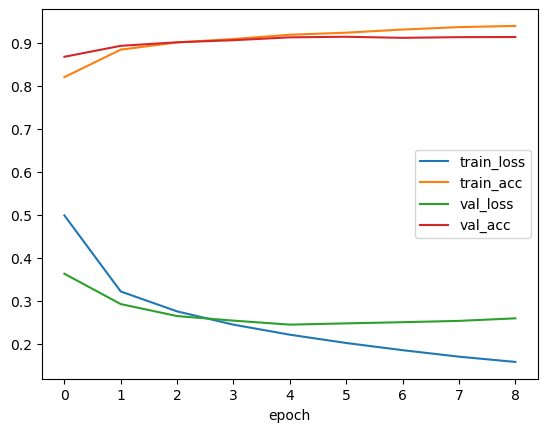

In [35]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 모델 성능 검증

In [37]:
scaled_test = x_test.reshape(-1, 28, 28, 1) / 255

In [38]:
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9103 - loss: 0.2562


[0.2486146241426468, 0.909500002861023]

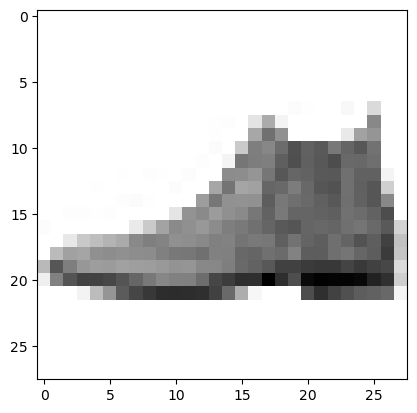

In [40]:
# 데이터 시각화
plt.imshow(scaled_test[0].reshape(28, 28), cmap = "gray_r")
plt.show()

In [42]:
preds = model.predict(scaled_test[[0]])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[5.12485077e-09 1.34759337e-09 1.84017179e-09 1.95697036e-09
  8.16425239e-09 1.02828955e-04 2.08574580e-08 8.38886408e-05
  2.66953015e-09 9.99813259e-01]]


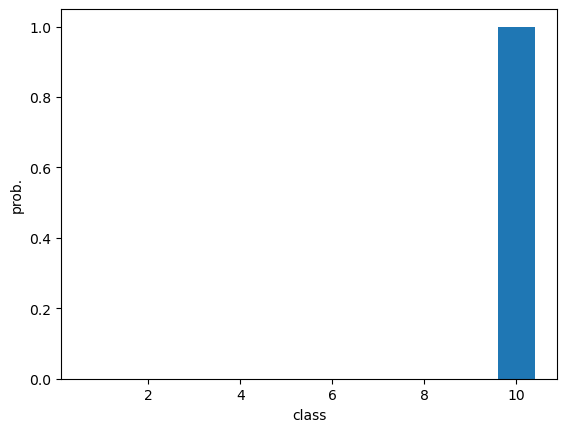

In [43]:
plt.figure()

plt.bar(range(1, 11), preds[0])

plt.xlabel("class")
plt.ylabel("prob.")
plt.show()

In [44]:
# 레이블 리스트
classes = ["티셔츠", "바지", "스웨터", "드레스", "코트", "샌달", "셔츠", "스니커즈", "가방", "앵클부츠"]

In [46]:
classes[np.argmax(preds)]

'앵클부츠'

In [47]:
classes[y_test[0]]

'앵클부츠'